In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from pylab import xticks,yticks,np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
print('data dimensions:',df.shape)

data dimensions: (1599, 12)


In [5]:
df.describe().round(2).T[:]

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [6]:
df.describe().round(2).iloc[1:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.0,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.0,0.15,0.17,1.07,0.81


In [8]:
sorted(df['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [9]:
correct_order = [3,4,5,6,7,8]
df['quality'].value_counts().reindex(correct_order)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [10]:
df['quality'].value_counts(normalize=True).reindex(correct_order).round(4)

3    0.0063
4    0.0331
5    0.4259
6    0.3990
7    0.1245
8    0.0113
Name: quality, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
print("Number of missing values:")
df.isna().sum()

Number of missing values:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

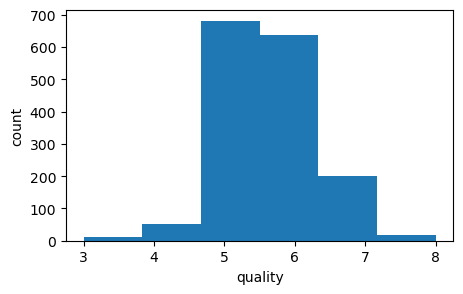

In [13]:
plt.figure(figsize=(5,3))

df['quality'].plot.hist(bins = df['quality'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

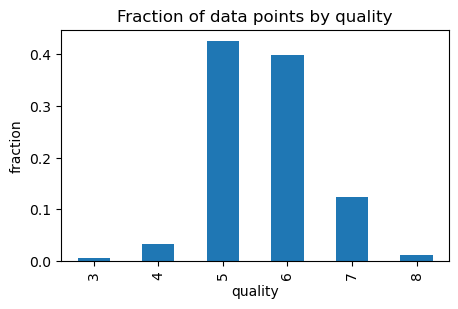

In [15]:
plt.figure(figsize=(5,3))
pd.value_counts(df['quality'],normalize=True).reindex(correct_order).plot.bar()
plt.title("Fraction of data points by quality")
plt.ylabel('fraction')
plt.xlabel("quality")
plt.show()

In [16]:
X = df.iloc[:,:11]
y = df.iloc[:,11:]

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [18]:
corrWithY = df.corrwith(df["quality"])
corrWithY

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

In [19]:
# Top 5 features correlated with target variable quality: alcohol, volatile acidity, sulphates, citric acid, total sulfur dioxide
print("Linear correlation between each feature")
print("and target variable (quality):")
corrWithY.sort_values().round(4)

Linear correlation between each feature
and target variable (quality):


volatile acidity       -0.3906
total sulfur dioxide   -0.1851
density                -0.1749
chlorides              -0.1289
pH                     -0.0577
free sulfur dioxide    -0.0507
residual sugar          0.0137
fixed acidity           0.1241
citric acid             0.2264
sulphates               0.2514
alcohol                 0.4762
quality                 1.0000
dtype: float64

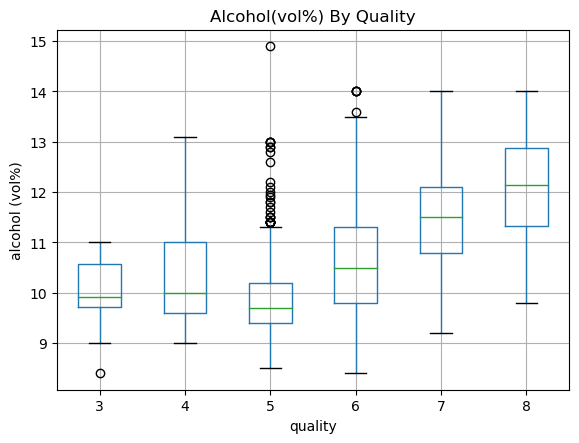

In [20]:
df[['alcohol','quality']].boxplot(by='quality')
plt.xlabel('quality')
plt.ylabel('alcohol (vol%)')
plt.title("Alcohol(vol%) By Quality")
plt.suptitle('')
plt.show()

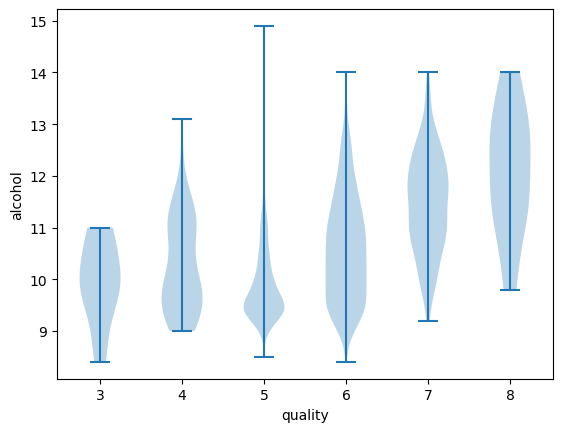

In [21]:
dataset = [df[df['quality']==3]['alcohol'].values,
           df[df['quality']==4]['alcohol'].values,
           df[df['quality']==5]['alcohol'].values,
           df[df['quality']==6]['alcohol'].values,
           df[df['quality']==7]['alcohol'].values,
           df[df['quality']==8]['alcohol'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],[3,4,5,6,7,8])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

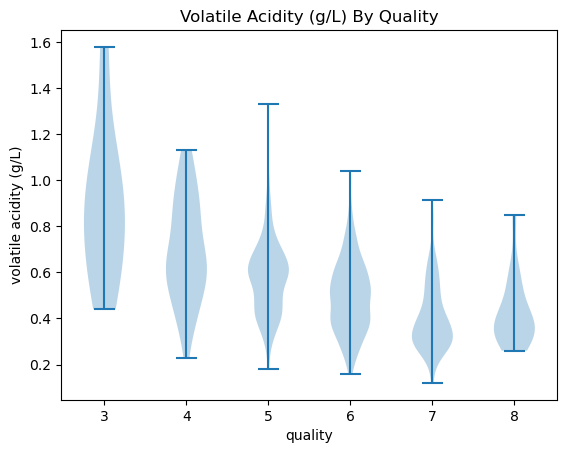

In [22]:
dataset = [df[df['quality']==3]['volatile acidity'].values,
           df[df['quality']==4]['volatile acidity'].values,
           df[df['quality']==5]['volatile acidity'].values,
           df[df['quality']==6]['volatile acidity'].values,
           df[df['quality']==7]['volatile acidity'].values,
           df[df['quality']==8]['volatile acidity'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],[3,4,5,6,7,8])
plt.xlabel("quality")
plt.ylabel('volatile acidity (g/L)')
plt.title("Volatile Acidity (g/L) By Quality")
plt.show()

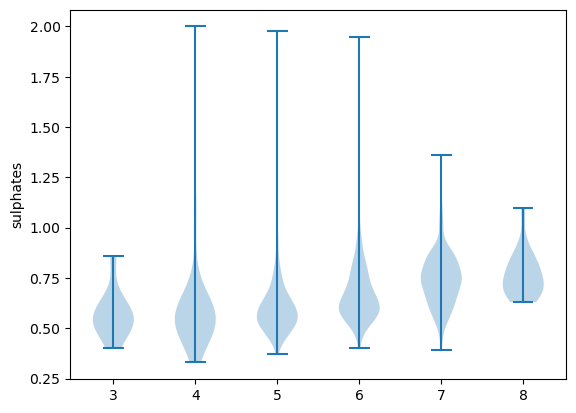

In [23]:
dataset = [df[df['quality']==3]['sulphates'].values,
           df[df['quality']==4]['sulphates'].values,
           df[df['quality']==5]['sulphates'].values,
           df[df['quality']==6]['sulphates'].values,
           df[df['quality']==7]['sulphates'].values,
           df[df['quality']==8]['sulphates'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],[3,4,5,6,7,8])
plt.ylabel('sulphates')
plt.show()

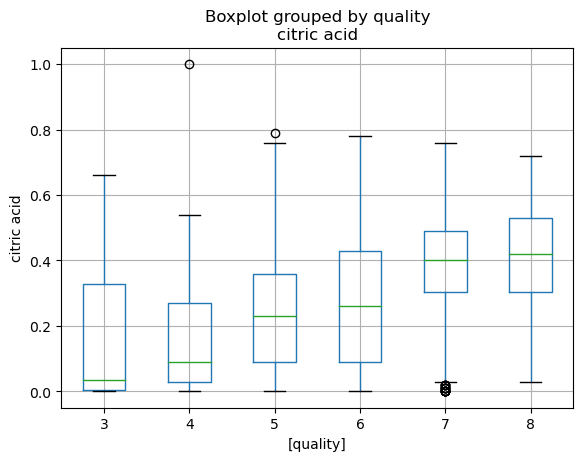

In [24]:
df[['citric acid','quality']].boxplot(by='quality')
plt.ylabel('citric acid')
plt.show()

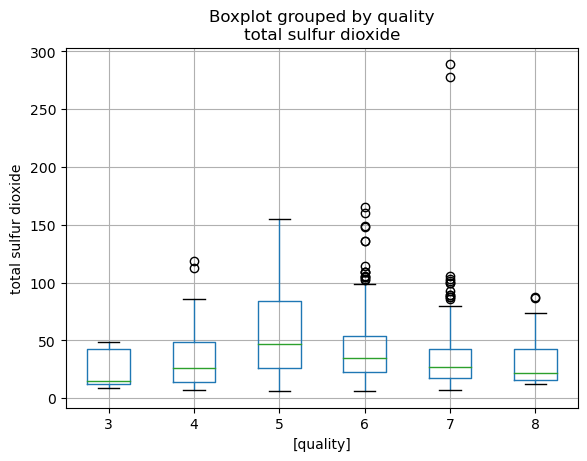

In [25]:
df[['total sulfur dioxide','quality']].boxplot(by='quality')
plt.ylabel('total sulfur dioxide')
plt.show()

In [26]:
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(666)

In [27]:
# linear correlation

f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)

# Answer: the top 5 most important features: 

f score [2.49600375e+01 2.87444450e+02 8.62577262e+01 3.01183699e-01
 2.69856084e+01 4.10850227e+00 5.66578176e+01 5.04052231e+01
 5.34046221e+00 1.07740433e+02 4.68267011e+02]
p values [6.49563501e-07 2.05171481e-59 4.99129525e-20 5.83218013e-01
 2.31338265e-07 4.28339795e-02 8.62170342e-14 1.87495665e-12
 2.09627787e-02 1.80208845e-24 2.83147697e-91]


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.feature_selection import SelectKBest
f_select = SelectKBest(f_regression,k=5)
X_f = f_select.fit_transform(X,y)
# plt.scatter(X_f,y,edgecolor='k')
# plt.show()
# the features selected:
top5FScore = f_select.get_support()
print(top5FScore)

[False  True  True False False False  True False False  True  True]


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
f_test[top5FScore]

array([287.44444971,  86.2577262 ,  56.65781756, 107.74043302,
       468.26701064])

In [30]:
X.columns[top5FScore]

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

In [31]:
top5 = np.sort(f_test[top5FScore])
top5

array([ 56.65781756,  86.2577262 , 107.74043302, 287.44444971,
       468.26701064])

In [32]:
top5Col = X.columns[top5FScore][np.argsort(f_test[top5FScore])]
top5Col

Index(['total sulfur dioxide', 'citric acid', 'sulphates', 'volatile acidity',
       'alcohol'],
      dtype='object')

In [36]:
pear_corr = X.corr()
pear_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


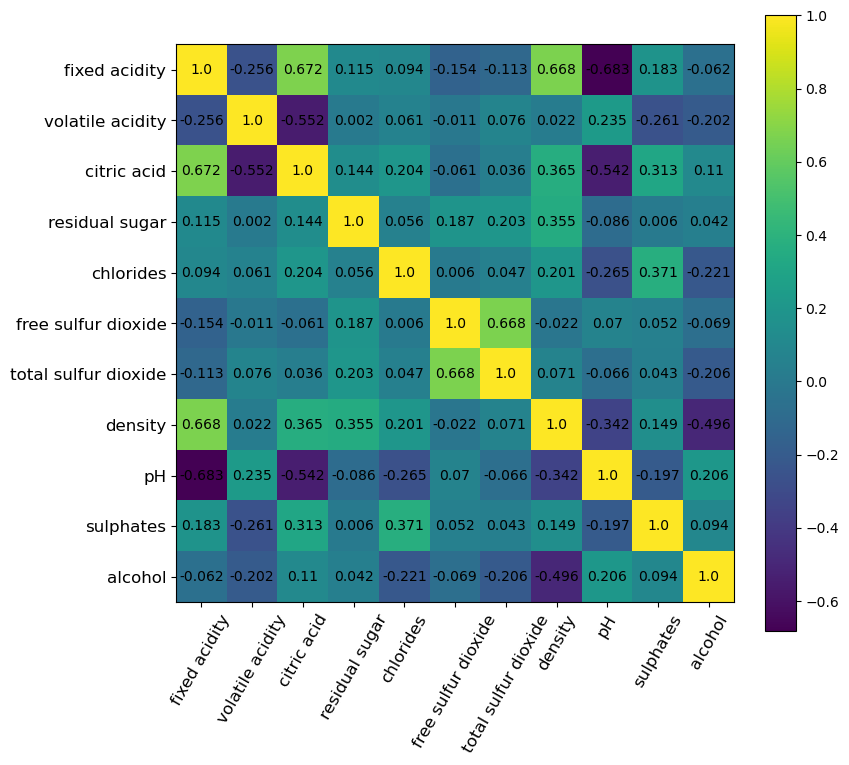

In [37]:


# visualize the correlation matrix as a heatmap

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

xticks(np.linspace(0,10,11,endpoint=True))
yticks(np.linspace(0,10,11,endpoint=True))

# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(X.columns, rotation=60, fontsize=12)
ax.set_yticklabels(X.columns, rotation=0, fontsize=12)

# Loop over data dimensions and create text annotations
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        text = ax.text(j, i, round(pear_corr.to_numpy()[i, j], 3),
                       ha="center", va="center", color="black")

plt.show()

# fixed acidity and pH are highly correlated
# fixed acidity and citric acid are highly correlated
# fixed acidity and density are highly correlated
# free sulfur dioxide and total sulfur dioxide are highly correlated

<Figure size 500x300 with 0 Axes>

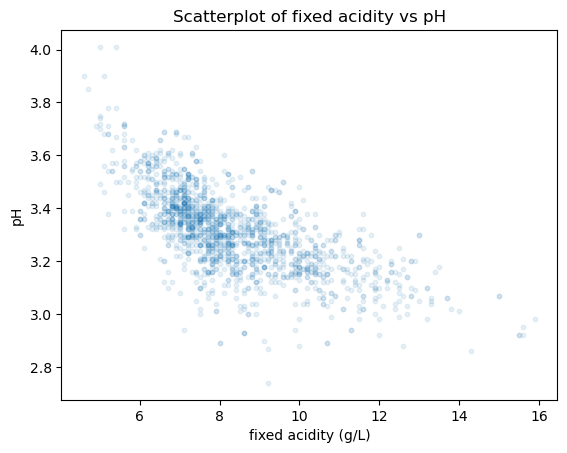

In [38]:
plt.figure(figsize=(5,3))
df.plot.scatter('fixed acidity','pH',s=10,alpha=0.1) # alpha=0.1,s=10
plt.xlabel("fixed acidity (g/L)")
plt.title("Scatterplot of fixed acidity vs pH")
plt.show()

<Figure size 500x300 with 0 Axes>

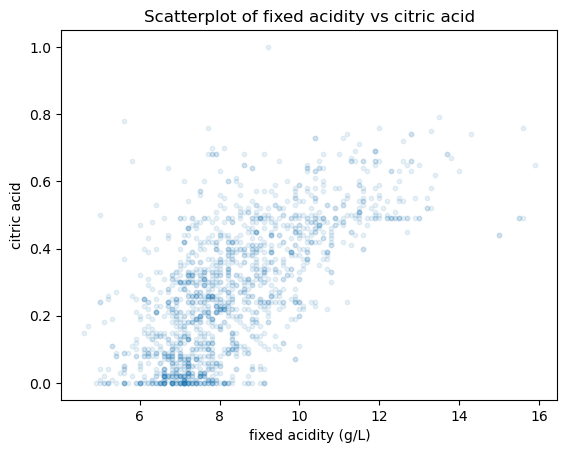

In [39]:
plt.figure(figsize=(5,3))
df.plot.scatter('fixed acidity','citric acid',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title("Scatterplot of fixed acidity vs citric acid")
plt.xlabel("fixed acidity (g/L)")
plt.show()

<Figure size 500x300 with 0 Axes>

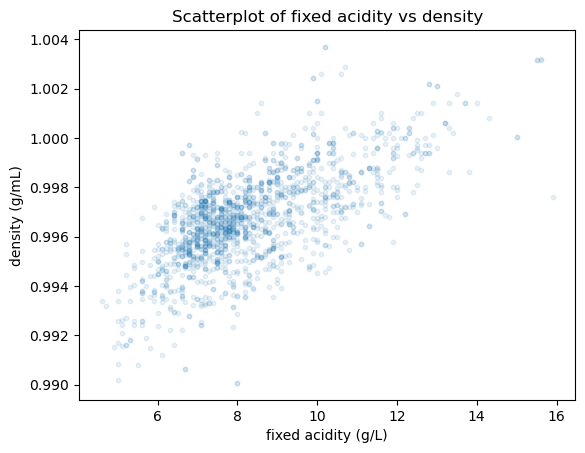

In [40]:
plt.figure(figsize=(5,3))
df.plot.scatter('fixed acidity','density',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title("Scatterplot of fixed acidity vs density")
plt.xlabel("fixed acidity (g/L)")
plt.ylabel("density (g/mL)")
plt.show()

<Figure size 500x300 with 0 Axes>

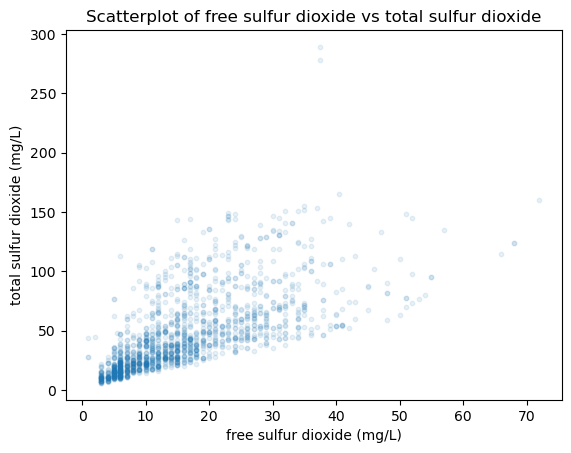

In [41]:
plt.figure(figsize=(5,3))
df.plot.scatter('free sulfur dioxide','total sulfur dioxide',s=10,alpha=0.1) # alpha=0.1,s=10
plt.title("Scatterplot of free sulfur dioxide vs total sulfur dioxide")
plt.xlabel("free sulfur dioxide (mg/L)")
plt.ylabel("total sulfur dioxide (mg/L)")
plt.show()

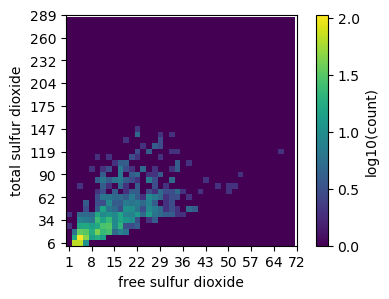

In [42]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['free sulfur dioxide'], df['total sulfur dioxide'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

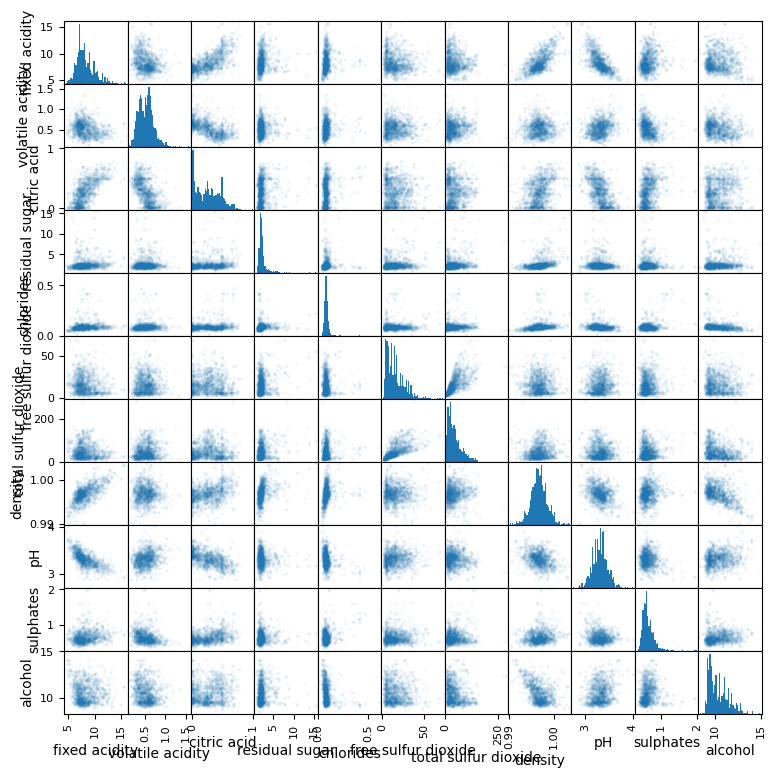

In [43]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=5, alpha=.05)
plt.show()

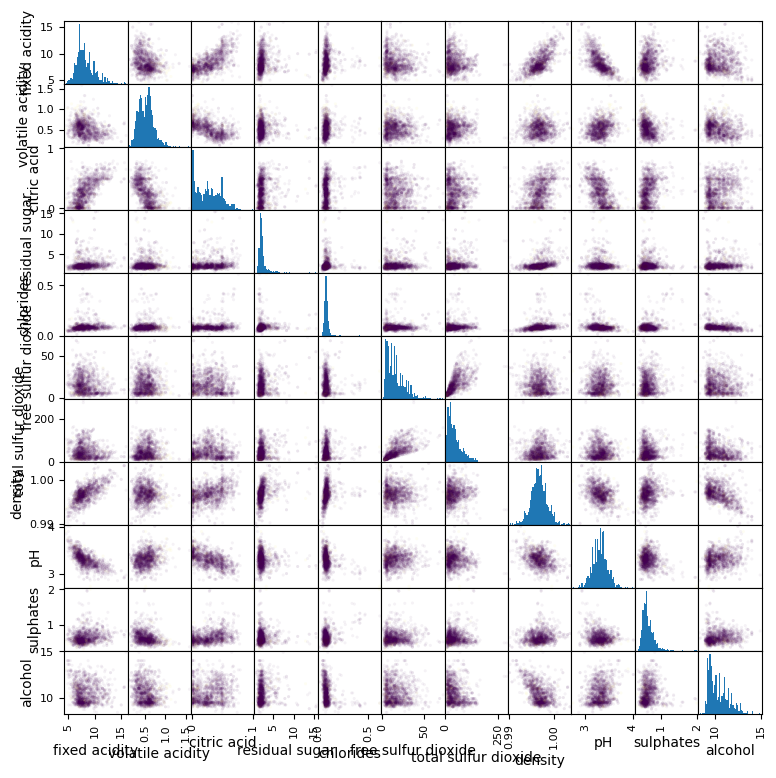

In [44]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9),c = pd.get_dummies(df['quality']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=5, alpha=.05)
plt.show()

In [45]:
random_state = 4

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(f'y_train:', np.unique(y_train,return_counts=True))
print(f'y_val:', np.unique(y_val,return_counts=True))
print(f'y_test:', np.unique(y_test,return_counts=True))

**balance with stratification:**
y_train: (array([3, 4, 5, 6, 7, 8]), array([  6,  32, 408, 383, 119,  11]))
y_val: (array([3, 4, 5, 6, 7, 8]), array([  2,  11, 137, 127,  40,   3]))
y_test: (array([3, 4, 5, 6, 7, 8]), array([  2,  10, 136, 128,  40,   4]))


In [46]:
print('X_train dimensions:',X_train.shape)
print('X_val dimensions:',X_val.shape)
print('X_test dimensions:',X_test.shape)

X_train dimensions: (959, 11)
X_val dimensions: (320, 11)
X_test dimensions: (320, 11)


In [69]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# collect which encoder to use on each feature
# needs to be done manually
minmax_ftrs = ['pH','alcohol']
std_ftrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(959, 11)
(959, 11)
[[ 0.38793103  0.28571429  0.74504727 ...  0.07299979  0.78703588
   0.22622826]
 [ 0.48275862  0.32142857 -0.79456889 ...  1.96131057  1.3001823
   2.88996561]
 [ 0.62068966  0.73214286 -1.32751295 ...  0.72307399 -1.76777819
  -0.05714805]
 ...
 [ 0.48275862  0.26785714 -0.20240883 ...  1.806531   -0.34297803
  -0.96395225]
 [ 0.62931034  0.23214286 -1.14986493 ...  0.04204388 -0.08094582
   0.6229551 ]
 [ 0.38793103  0.19642857  1.15955932 ... -1.01045721  1.44211641
  -0.22717384]]


In [56]:
X_train_prep.mean(axis=0)

array([ 4.89401676e-01,  3.54576320e-01,  3.88983250e-17,  1.44479493e-16,
        1.68559408e-16, -3.44528021e-16,  3.57494129e-16, -1.40774890e-16,
        8.15012523e-17, -2.97109111e-15,  2.86180534e-16])

In [57]:
X_val_prep.mean(axis=0)

array([ 0.50449892,  0.36033296, -0.07046817, -0.06720279, -0.01813224,
        0.1184836 , -0.07680919, -0.05679302, -0.02393092, -0.01228178,
       -0.05643961])

In [58]:
X_test_prep.mean(axis=0)

array([ 0.48898168,  0.38215216,  0.00484719,  0.12003986, -0.01943422,
        0.0851908 ,  0.02202637, -0.01686705, -0.0029873 , -0.01936143,
        0.00165254])

In [59]:
X_train_prep.std(axis=0)

array([0.13113799, 0.18379667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [60]:
X_train_prep[:2]

array([[ 3.87931034e-01,  2.85714286e-01,  7.45047271e-01,
        -8.22247545e-01,  1.95716763e-01,  8.83586805e-03,
         1.61380728e-01, -2.54246821e-03,  7.29997919e-02,
         7.87035880e-01,  2.26228264e-01],
       [ 4.82758621e-01,  3.21428571e-01, -7.94568895e-01,
         4.17233643e-01,  1.43637858e-01,  1.65419460e+00,
        -4.04115201e-01,  3.87573854e-01,  1.96131057e+00,
         1.30018230e+00,  2.88996561e+00]])

In [61]:
X_train[:2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
389,9.6,0.38,0.31,2.5,0.096,16.0,49.0,0.99820,3.19,0.70,10.0
1289,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2


In [62]:
MinMaxScaler?

In [63]:
X_train["pH"].max()

3.9

In [64]:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

(3.19-2.74)/(3.9-2.74)


0.3879310344827585

In [65]:
StandardScaler?

In [66]:
# z = (x - u) / s

X_train["fixed acidity"].mean()

8.341814389989572

In [67]:
X_train["fixed acidity"].std()

1.689613747834089

In [68]:
(7.0-8.341814389989572)/1.689613747834089

-0.7941545170957803

In [70]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

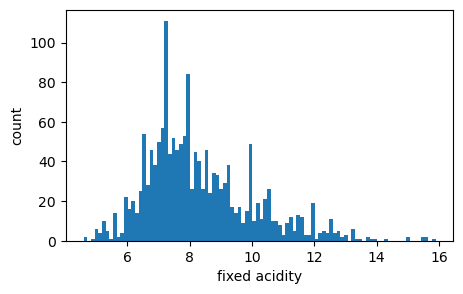

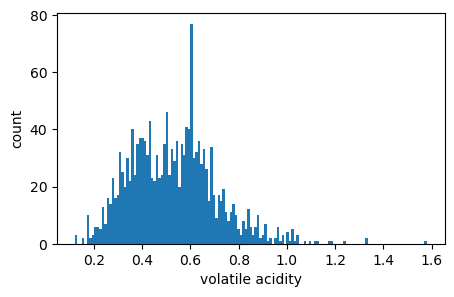

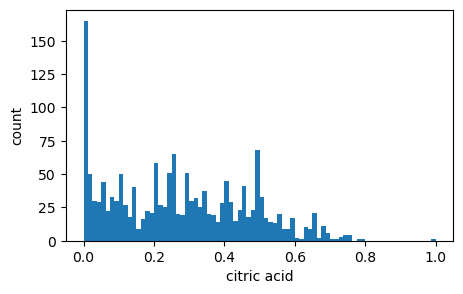

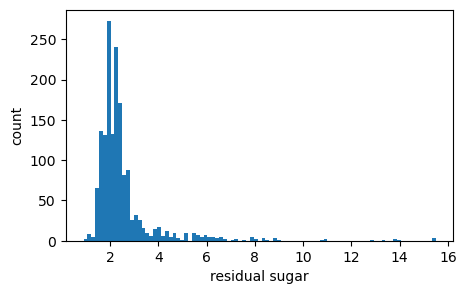

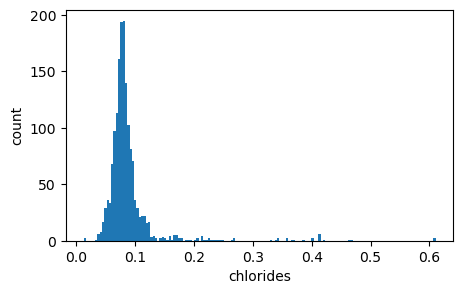

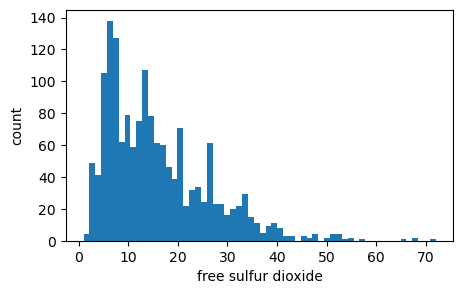

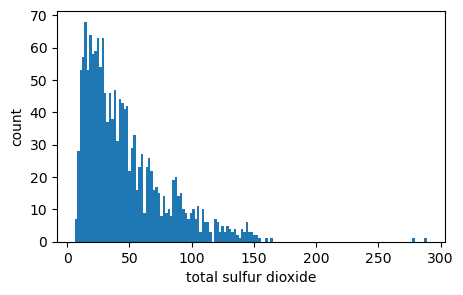

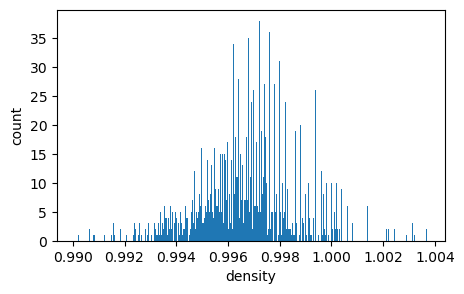

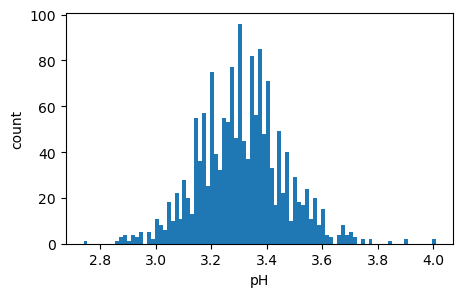

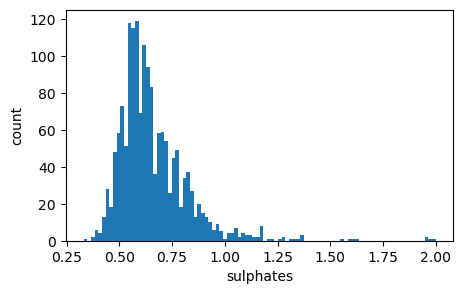

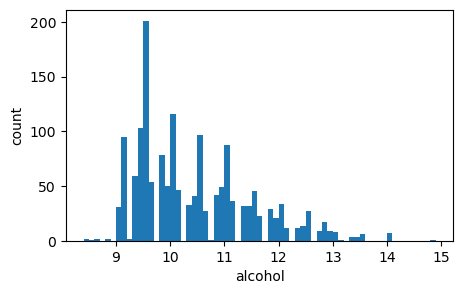

In [71]:
for i in range(11):
    plt.figure(figsize=(5,3))
    df[df.columns[i]].plot.hist(bins = df[df.columns[i]].nunique())   # bins = int(np.sqrt(df.shape[0])) 
    plt.xlabel(str(df.columns[i]))
    plt.ylabel('count')
    plt.show()